In [85]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X_train= pd.read_csv('./X_train_all_feature.csv',index_col=0)
y_train= pd.read_csv('./y_train_all_feature.csv')
X_test= pd.read_csv('./X_test_all_feature.csv', index_col=0)
y_test= pd.read_csv('./y_test_all_feature.csv')
X_test.fillna(0,inplace=True)

In [86]:
›

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
steps = [('Rescale', MinMaxScaler()),
         ('rfc', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                         random_state = 0,class_weight='balanced',
                                         min_samples_split=50,oob_score=True,
                                         max_features='sqrt',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [88]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:       ',np.count_nonzero(y_test_pred ==1)/y_test.size)


original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:        0.04990757855822551


In [89]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc,plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
y_test_proba = model.predict_proba(X_test)
y_test_score= y_test_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_test_score)
auc_precision_recall = auc(recall, precision)
print('test AUC: ',auc_precision_recall)
y_train_proba = model.predict_proba(X_train)
y_train_score= y_train_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, y_train_score)
auc_precision_recall = auc(recall, precision)
print('train AUC: ',auc_precision_recall)


test AUC:  0.7414710186115491
train AUC:  0.9216040670997482


In [90]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = np.arange(2,40,2), cv = 3)

In [91]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

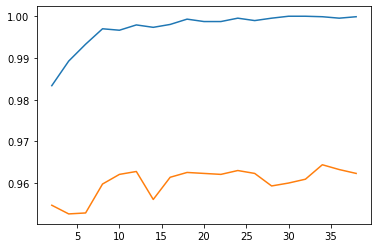

In [92]:
plt.plot(np.arange(2,40,2),train_scores_mean, label="Training score")
plt.plot(np.arange(2,40,2),test_scores_mean ,label="Cross-validation score")


In [93]:
from sklearn.model_selection import GridSearchCV
n_estimators = [5,10,15,20]
max_depth = [15, 25, 30]
min_samples_split = [50, 100, 150]
min_samples_leaf = [2, 5, 10, 20, 30] 

hyperF = dict(rfc__n_estimators = n_estimators, 
              rfc__max_depth = max_depth,  
              rfc__min_samples_split = min_samples_split, 
             rfc__min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-ve

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fin

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fin

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs d

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-ve

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fin

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fin

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fin

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used

  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

/Users/xinwen/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [94]:
bestF.best_params_

{'rfc__max_depth': 15,
 'rfc__min_samples_leaf': 5,
 'rfc__min_samples_split': 50,
 'rfc__n_estimators': 15}

In [95]:
hyperF

{'rfc__n_estimators': [5, 10, 15, 20],
 'rfc__max_depth': [15, 25, 30],
 'rfc__min_samples_split': [50, 100, 150],
 'rfc__min_samples_leaf': [2, 5, 10, 20, 30]}

In [96]:
steps = [('Rescale', MinMaxScaler()),
         ('rfc', RandomForestClassifier(n_estimators = 15, criterion = 'entropy', 
                                         random_state = 0,class_weight='balanced',
                                         min_samples_split=50,oob_score=True,
                                         max_features='sqrt',max_depth=15,min_samples_leaf=5))]
model_hf = Pipeline(steps)
model_hf = model_hf.fit(X_train,y_train)
y_train_pred = model_hf.predict(X_train)
y_test_pred = model_hf.predict(X_test)

In [97]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc,plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
y_test_proba = model_hf.predict_proba(X_test)
y_test_score= y_test_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_test_score)
auc_precision_recall = auc(recall, precision)
print('test AUC: ',auc_precision_recall)
y_train_proba = model_hf.predict_proba(X_train)
y_train_score= y_train_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, y_train_score)
auc_precision_recall = auc(recall, precision)
print('train AUC: ',auc_precision_recall)


test AUC:  0.7577882061168674
train AUC:  0.921652444509749


In [98]:
print('Improvement of Test AUC {:0.2f}%.'.format( 100 * (0.7577882061168674 - 0.7414710186115491) / 0.7414710186115491))


Improvement of Test AUC 2.20%.


In [99]:
#campare to baseline
print('Improvement of Test AUC {:0.2f}%.'.format( 100 * (0.7577882061168674 - 0.6900245412904393) / 0.6900245412904393))

Improvement of Test AUC 9.82%.


In [100]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:       ',np.count_nonzero(y_test_pred ==1)/y_test.size)


original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:        0.038817005545286505


In [101]:
threshold = 0.34

y_test_proba = model_hf.predict_proba(X_test)
y_test_pred_8 = (y_test_proba[:,1] >= threshold).astype('int')

In [102]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:       ',np.count_nonzero(y_test_pred ==1)/y_test.size)
print('threshold=0.37 test Fraud percentage: ',np.count_nonzero(y_test_pred_8==1)/y_test_pred_8.size)

original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:        0.038817005545286505
threshold=0.37 test Fraud percentage:  0.09149722735674677


In [103]:
from sklearn.metrics import precision_score
score_original=precision_score(y_test, y_test_pred, average='weighted')

score_8=precision_score(y_test, y_test_pred_8, average='weighted')

print('precision score improvement:  {:0.2f}%.'.format(( score_8-score_original)/score_original))


precision score improvement:  0.02%.


In [104]:
score_original

0.9249739324138586

In [105]:
score_8

0.9417398943031555

In [106]:
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model_hf)
mp.metrics()

,0,1
0,roc_auc_score(train),0.992
1,roc_auc_score(test),0.929
2,PR-AUC(train),0.922
3,PR-AUC(test),0.758
4,average_precision(train),0.922
5,average_precision(test),0.758
6,precision_score(train),0.966
7,precision_score(test),0.925


In [108]:
import numpy as np
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import PrecisionRecallDisplay

y_test_score = model_hf.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_test_score)

#display = PrecisionRecallDisplay(precision, recall, thresholds)
#display.plot()

TypeError: __init__() takes 3 positional arguments but 4 were given

In [110]:
y_test_score

array([0.74890856, 0.        , 0.30118241, ..., 0.14163897, 0.10835846,
       0.13370298])

In [111]:
# save the model to disk
import joblib
filename = 'rf_model.sav'
joblib.dump(model_hf, filename)

['rf_model.sav']

# calibaration

In [112]:
y_test_pred_hf = model_hf.predict(X_test)
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:  ',np.count_nonzero(y_test_pred_hf ==1)/y_test.size)

original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:   0.038817005545286505


In [121]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
rfc=CalibratedClassifierCV(model_hf[1][1], method='isotonic')

rfc.fit(X_train,y_train)
y_test_proba_rfc = rfc.predict_proba(X_test)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_proba [:,1], n_bins=10)
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y_test, y_test_proba_rfc [:,1], n_bins=10)

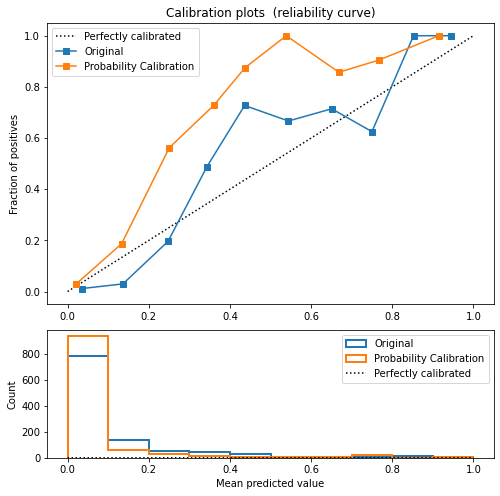

In [122]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % ('Original', ))
ax1.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-",label="%s" % ('Probability Calibration', ))
ax2.hist(y_test_proba [:,1], range=(0, 1), bins=10, label='Original',
             histtype="step", lw=2)
ax2.hist(y_test_proba_rfc [:,1], range=(0, 1), bins=10, label='Probability Calibration',
             histtype="step", lw=2)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.set_ylabel("Fraction of positives")
ax1.set_title('Calibration plots  (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax1.legend()
ax2.legend()
plt.show()

In [123]:
y_test_pred_rfc = rfc.predict(X_test)
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:  ',np.count_nonzero(y_test_pred_rfc ==1)/y_test.size)


original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:   0.033271719038817


In [124]:
from sklearn.metrics import brier_score_loss
y_test_proba_rfc = rfc.predict_proba(X_test)
print('brier_score is : ', brier_score_loss(y_test, y_test_proba_rfc[:,1]))

brier_score is :  0.050800644004278826
